* Name = Pranav Patil
* MIS  = 712570009

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import datasets, transforms
from torchvision.utils import save_image
import torchvision
import matplotlib.pyplot as plt
import os

In [13]:
# Device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Hyperparameters
latent_dim = 128
img_shape = (1, 28, 28)
batch_size = 64
lr = 0.0002
epochs = 1000

In [14]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataset = MNIST(
    root="./data",
    train=True,
    transform=transform,
    download=True
)

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [15]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 28 * 28),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img.view(img.size(0), *img_shape)

In [16]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        img = img.view(img.size(0), -1)
        return self.model(img)

In [17]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

adversarial_loss = nn.BCELoss()

optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

In [18]:
fixed_z = torch.randn(16, latent_dim, device=device)

os.makedirs("vanilla_gan_outputs", exist_ok=True)

In [19]:
def save_generated_images(epoch):
    generator.eval()
    with torch.no_grad():
        gen_imgs = generator(fixed_z).detach().cpu()

    grid = torchvision.utils.make_grid(
        gen_imgs,
        nrow=4,
        normalize=True
    )

    plt.figure(figsize=(4, 4))
    plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap="gray")
    plt.axis("off")
    plt.title(f"Epoch {epoch}")
    plt.show()

    save_image(
        gen_imgs,
        f"vanilla_gan_outputs/epoch_{epoch}.png",
        nrow=4,
        normalize=True
    )

    generator.train()

Epoch [1/1000] Batch [0/938] D Loss: 1.3988 G Loss: 0.6774
Epoch [1/1000] Batch [400/938] D Loss: 1.0157 G Loss: 1.1511
Epoch [1/1000] Batch [800/938] D Loss: 0.7847 G Loss: 1.7155


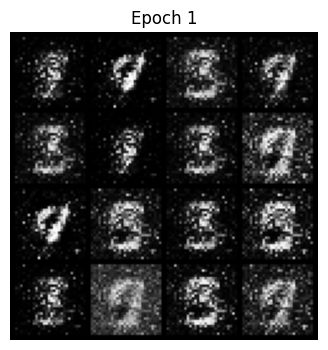

Epoch [2/1000] Batch [0/938] D Loss: 0.8047 G Loss: 1.9368
Epoch [2/1000] Batch [400/938] D Loss: 0.7062 G Loss: 1.5410
Epoch [2/1000] Batch [800/938] D Loss: 0.9134 G Loss: 1.7114
Epoch [3/1000] Batch [0/938] D Loss: 0.9004 G Loss: 1.8949
Epoch [3/1000] Batch [400/938] D Loss: 0.7974 G Loss: 1.5279
Epoch [3/1000] Batch [800/938] D Loss: 0.8443 G Loss: 1.4271
Epoch [4/1000] Batch [0/938] D Loss: 1.0220 G Loss: 1.2714
Epoch [4/1000] Batch [400/938] D Loss: 1.3025 G Loss: 3.3205
Epoch [4/1000] Batch [800/938] D Loss: 0.8799 G Loss: 2.0880
Epoch [5/1000] Batch [0/938] D Loss: 1.3747 G Loss: 0.9151
Epoch [5/1000] Batch [400/938] D Loss: 0.9249 G Loss: 1.4597
Epoch [5/1000] Batch [800/938] D Loss: 0.9741 G Loss: 0.8516
Epoch [6/1000] Batch [0/938] D Loss: 1.0158 G Loss: 1.1467
Epoch [6/1000] Batch [400/938] D Loss: 0.9552 G Loss: 0.7889
Epoch [6/1000] Batch [800/938] D Loss: 0.9169 G Loss: 1.8443
Epoch [7/1000] Batch [0/938] D Loss: 0.9563 G Loss: 1.6485
Epoch [7/1000] Batch [400/938] D Los

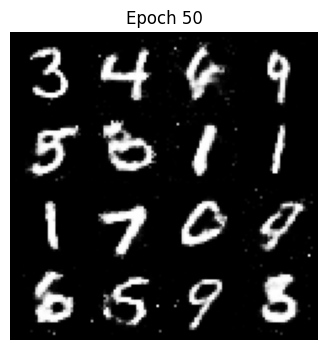

Epoch [51/1000] Batch [0/938] D Loss: 1.0814 G Loss: 1.3452
Epoch [51/1000] Batch [400/938] D Loss: 1.0928 G Loss: 1.0093
Epoch [51/1000] Batch [800/938] D Loss: 1.1588 G Loss: 1.3602
Epoch [52/1000] Batch [0/938] D Loss: 1.2057 G Loss: 1.1646
Epoch [52/1000] Batch [400/938] D Loss: 1.1458 G Loss: 0.9072
Epoch [52/1000] Batch [800/938] D Loss: 1.1536 G Loss: 1.3096
Epoch [53/1000] Batch [0/938] D Loss: 1.3027 G Loss: 1.6934
Epoch [53/1000] Batch [400/938] D Loss: 1.1367 G Loss: 0.9701
Epoch [53/1000] Batch [800/938] D Loss: 1.1444 G Loss: 1.0206
Epoch [54/1000] Batch [0/938] D Loss: 1.1985 G Loss: 1.3508
Epoch [54/1000] Batch [400/938] D Loss: 1.3101 G Loss: 1.5872
Epoch [54/1000] Batch [800/938] D Loss: 1.1563 G Loss: 1.1837
Epoch [55/1000] Batch [0/938] D Loss: 1.0476 G Loss: 1.2537
Epoch [55/1000] Batch [400/938] D Loss: 1.0478 G Loss: 1.3850
Epoch [55/1000] Batch [800/938] D Loss: 0.9920 G Loss: 1.3816
Epoch [56/1000] Batch [0/938] D Loss: 1.1990 G Loss: 1.3272
Epoch [56/1000] Batc

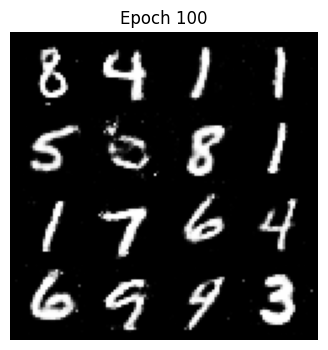

Epoch [101/1000] Batch [0/938] D Loss: 1.1284 G Loss: 0.8617
Epoch [101/1000] Batch [400/938] D Loss: 1.3041 G Loss: 0.8700
Epoch [101/1000] Batch [800/938] D Loss: 1.2459 G Loss: 1.3700
Epoch [102/1000] Batch [0/938] D Loss: 1.2323 G Loss: 1.1461
Epoch [102/1000] Batch [400/938] D Loss: 1.0718 G Loss: 1.3707
Epoch [102/1000] Batch [800/938] D Loss: 1.0940 G Loss: 1.5446
Epoch [103/1000] Batch [0/938] D Loss: 0.9755 G Loss: 1.1172
Epoch [103/1000] Batch [400/938] D Loss: 0.9994 G Loss: 1.3709
Epoch [103/1000] Batch [800/938] D Loss: 1.1729 G Loss: 0.7994
Epoch [104/1000] Batch [0/938] D Loss: 1.1702 G Loss: 1.2559
Epoch [104/1000] Batch [400/938] D Loss: 1.1439 G Loss: 1.1604
Epoch [104/1000] Batch [800/938] D Loss: 1.0356 G Loss: 1.1023
Epoch [105/1000] Batch [0/938] D Loss: 1.1239 G Loss: 1.1735
Epoch [105/1000] Batch [400/938] D Loss: 1.0912 G Loss: 1.4486
Epoch [105/1000] Batch [800/938] D Loss: 1.2798 G Loss: 1.4542
Epoch [106/1000] Batch [0/938] D Loss: 1.0948 G Loss: 1.2732
Epoc

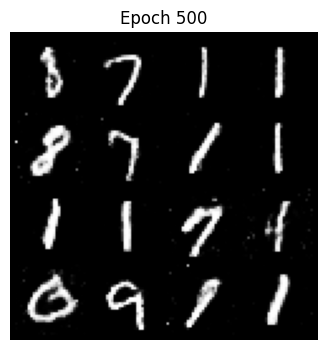

Epoch [501/1000] Batch [0/938] D Loss: 0.6872 G Loss: 1.9485
Epoch [501/1000] Batch [400/938] D Loss: 0.8041 G Loss: 1.7204
Epoch [501/1000] Batch [800/938] D Loss: 0.8654 G Loss: 1.8002
Epoch [502/1000] Batch [0/938] D Loss: 0.9211 G Loss: 1.1631
Epoch [502/1000] Batch [400/938] D Loss: 0.5289 G Loss: 2.0910
Epoch [502/1000] Batch [800/938] D Loss: 0.7167 G Loss: 2.4392
Epoch [503/1000] Batch [0/938] D Loss: 0.8427 G Loss: 1.9643
Epoch [503/1000] Batch [400/938] D Loss: 0.9621 G Loss: 2.2465
Epoch [503/1000] Batch [800/938] D Loss: 0.7535 G Loss: 1.7045
Epoch [504/1000] Batch [0/938] D Loss: 0.7563 G Loss: 2.4084
Epoch [504/1000] Batch [400/938] D Loss: 0.7367 G Loss: 2.0581
Epoch [504/1000] Batch [800/938] D Loss: 0.6953 G Loss: 1.9314
Epoch [505/1000] Batch [0/938] D Loss: 0.6081 G Loss: 2.1618
Epoch [505/1000] Batch [400/938] D Loss: 0.5923 G Loss: 2.2210
Epoch [505/1000] Batch [800/938] D Loss: 0.9115 G Loss: 2.0324
Epoch [506/1000] Batch [0/938] D Loss: 0.7456 G Loss: 1.6104
Epoc

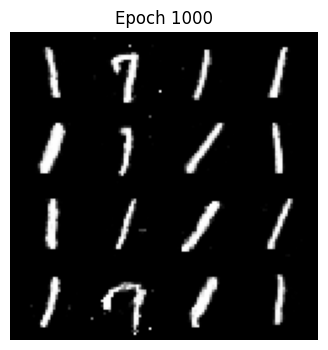

In [20]:
for epoch in range(epochs):
    for i, (imgs, _) in enumerate(dataloader):

        real_imgs = imgs.to(device)
        batch_size_curr = real_imgs.size(0)

        valid = torch.ones(batch_size_curr, 1, device=device)
        fake = torch.zeros(batch_size_curr, 1, device=device)

        # ---- Train Discriminator ----
        optimizer_D.zero_grad()

        real_loss = adversarial_loss(
            discriminator(real_imgs), valid
        )

        z = torch.randn(batch_size_curr, latent_dim, device=device)
        gen_imgs = generator(z)

        fake_loss = adversarial_loss(
            discriminator(gen_imgs.detach()), fake
        )

        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # ---- Train Generator ----
        optimizer_G.zero_grad()

        g_loss = adversarial_loss(
            discriminator(gen_imgs), valid
        )

        g_loss.backward()
        optimizer_G.step()

        if i % 400 == 0:
            print(
                f"Epoch [{epoch+1}/{epochs}] "
                f"Batch [{i}/{len(dataloader)}] "
                f"D Loss: {d_loss.item():.4f} "
                f"G Loss: {g_loss.item():.4f}"
            )

    # ---- Save only at selected epochs ----
    if (epoch + 1) in [1, 50, 100, 500, 1000]:
        save_generated_images(epoch + 1)

In [ ]:
hgchc